In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, validation_curve

In [2]:
df = pd.read_csv('df_after_cleaning.csv').drop(['Unnamed: 0', 'source'], axis=1)
# df

In [3]:
# df.dtypes

In [4]:
# keeping only numerical features for this test
features_to_delete = ['postcode', 'house_is', 'property_subtype', 'equipped_kitchen_has', 'furnished', 'open_fire', 'terrace', 'terrace_area', 'garden', 'garden_area', 'facades_number', 'swimming_pool_has', 'region', 'building_state_agg']
df.drop(features_to_delete, axis=1, inplace=True)
# df

In [5]:
df.dropna(axis=0, inplace=True)
# df

In [6]:
X = df.loc[:, df.columns != 'price'].to_numpy()
y = df['price'].to_numpy()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4444, test_size=0.20)

In [76]:
# X_train, y_train, X_test, y_test

In [77]:
pipe = make_pipeline(PolynomialFeatures(), RobustScaler(),LinearRegression())
# np.random.seed(4)
degree_range = np.arange(1,5)
k = 5
train_scores, valid_scores = validation_curve(pipe,
                                              X_train, y_train,
                                              param_name='polynomialfeatures__degree',
                                              param_range=degree_range,
                                              cv=k)

In [78]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0.5, 1.0, 'Validation Curve with Polynomial Regression\n5-fold Cross-Validation')

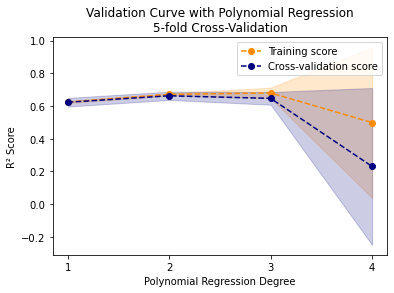

In [79]:
plt.plot(degree_range, train_scores_mean, color="darkorange",   marker='o', linestyle='--', label= 'Training score')
plt.fill_between(degree_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(degree_range, valid_scores_mean, color="navy",   marker='o', linestyle='--', label='Cross-validation score')
plt.fill_between(degree_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy")
plt.xticks(degree_range)
plt.xlabel('Polynomial Regression Degree')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.title(f'Validation Curve with Polynomial Regression\n{k}-fold Cross-Validation')

In [80]:
train_scores_mean, valid_scores_mean

(array([0.62440262, 0.67133473, 0.67993893, 0.49882559]),
 array([0.62324154, 0.66259335, 0.64672289, 0.23075959]))

In [87]:
for degree in degree_range:
    poly_reg = make_pipeline(PolynomialFeatures(degree), RobustScaler(), LinearRegression())
    poly_reg.fit(X_train, y_train)
    score_train = poly_reg.score(X_train, y_train)
    score_test = poly_reg.score(X_test, y_test)
    print(f'Polynomial of degree {degree}\n\ttrain score:\t{score_train}\n\ttest score:\t{score_test}')
    

Polynomial of degree 1
	train score:	0.6242022626845257
	test score:	0.5989326427282673
Polynomial of degree 2
	train score:	0.6703932493497766
	test score:	0.6261740763755217
Polynomial of degree 3
	train score:	0.6941828205866645
	test score:	0.6440389631041081
Polynomial of degree 4
	train score:	0.7243091532552348
	test score:	0.6279594276347213
